# **EECS 3401 Final Project: Understanding Heart Disease Risk**
### Group Members: Deep Patel, Yukta Bhutani, Abdul Wasay Faizan
#### Original Dataset Source: [link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=2022)
#### Modified Dataset Source: [link](https://github.com/Deep26053/EECS3401_Heart/blob/main/heart_2022_with_nans.csv)
### Project Description: 
This project aims to analyze a comprehensive dataset related to heart disease risk factors sourced from the Centers for Disease Control and Prevention (CDC). The dataset encompasses survey data from over 400,000 adults collected in 2022, focusing on key indicators associated with heart disease prevalence.

### Attributes for the heart disease dataset:

1. Age: Age of the respondent.
2. Gender: Gender of the respondent.
3. Race: Race of the respondent.
4. HighBloodPressure: Presence of high blood pressure (binary: "Yes" or "No").
5. HighCholesterol: Presence of high cholesterol (binary: "Yes" or "No").
6. SmokingStatus: Smoking status of the respondent.
7. DiabetesStatus: Diabetes status of the respondent.
8. Obesity: Obesity status of the respondent (measured by BMI).
9. PhysicalActivity: Level of physical activity.
10. AlcoholConsumption: Level of alcohol consumption.
11. OtherMedicalConditions: Presence of other medical conditions.
12. FamilyHistory: Family history of heart disease (binary: "Yes" or "No").
13. MedicationUsage: Usage of medications for heart disease or related conditions.
14. StressLevel: Level of stress reported by the respondent.
15. Diet: Dietary habits of the respondent.
16. ExerciseRoutine: Regularity of exercise routines.
17. SleepQuality: Quality of sleep reported by the respondent.
18. SocioeconomicStatus: Socioeconomic status of the respondent.
19. EducationLevel: Level of education attained by the respondent.
20. AccessToHealthcare: Access to healthcare facilities and services.
21. GeographicLocation: Geographic location of the respondent.
22. DateOfSurvey: Date when the survey was conducted.
23. HadHeartAttack: Presence of heart disease (binary: "Yes" or "No").

# 1. Frame the Problem:

### Task: 
Predict the likelihood of heart disease based on demographic and health-related variables using the Heart Disease dataset.

### Key Questions:
1. What are the demographic and health-related variables associated with heart disease risk?
2. How do factors such as age, gender, blood pressure, cholesterol levels, smoking status, diabetes status, obesity, physical activity, and alcohol consumption impact the likelihood of heart disease?
3. What is the distribution of heart disease cases among different demographic groups?
4. Can we identify patterns or correlations between variables and heart disease prevalence?
5. Which machine learning algorithm provides the most accurate predictions for heart disease likelihood?

- **Supervised Learning:** Since the dataset includes labelled data (e.g., presence or absence of heart disease), it is a supervised learning problem.
- **Classification Task:** The objective is to predict whether an individual is at risk of heart disease (binary classification).
- **Batch Learning:** The dataset represents a finite set of data collected at a specific time, making batch learning suitable for model training. There is no continuous flow of data coming into the system, and there is no need to adjust to changing data rapidly.
This framing of the problem provides clarity on the type of learning approach, the nature of the prediction task, and the appropriate learning technique to use for developing the heart disease prediction model.


# Look at the Big Picture:
The model's output (prediction of an individual's likelihood of heart disease) will be used as one of many signals in a broader healthcare system. This downstream system will aid healthcare professionals in making informed decisions regarding patient care, such as recommending preventive measures, lifestyle modifications, or medical interventions.

## Key Analyses:
- **Distribution of Heart Disease Risk Factors:**
Explored the prevalence and distribution of heart disease risk factors including blood pressure, cholesterol levels, smoking status, diabetes status, obesity, physical activity levels, and alcohol consumption to identify common patterns and variations.
- **Impact of Demographic Factors on Heart Disease Risk:**
Investigated the relationship between demographic factors (age, gender, ethnicity) and heart disease prevalence to identify any significant associations or disparities.
- **Correlation between Risk Factors and Heart Disease:**
Identified correlations between variables such as blood pressure, cholesterol levels, smoking status, and heart disease to understand their impact on heart disease risk.
- **Feature Importance Analysis:**
This analysis can provide insights into which demographic and health-related factors have the greatest impact on heart disease risk.

### Impact: 
By accurately predicting the likelihood of heart disease, the model can contribute to reducing the burden of cardiovascular disease, improving patient outcomes, and reducing healthcare costs associated with preventable heart-related complications.


In [84]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 2. Load Dataset:
Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series.
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [85]:
heart_data = pd.read_csv('heart_2022_with_nans.csv') # Read dataset from the CSV file into a DataFrame

In [86]:
heart_data.head() # Use head() to look at the first 5 rows

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [87]:
heart_data.describe() # Use describe() method to see a summary of the numerical attributes

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [88]:
heart_data.info() # Use info() to get a quick description of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [89]:
heart_data.shape #Determine the shape of the dataset

(445132, 40)

# 2. Cleaning Dataset

In [90]:
missing_values = heart_data.isnull().sum() #Check for missing values

In [91]:
# Remove columns with more than 50% missing values
heart_data.drop(columns = missing_values[missing_values > 0.5].index)

,State,Sex
0,Alabama,Female
1,Alabama,Female
2,Alabama,Female
3,Alabama,Female
4,Alabama,Female
...,...,...
445127,Virgin Islands,Female
445128,Virgin Islands,Female
445129,Virgin Islands,Female
445130,Virgin Islands,Male


In [92]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

# Apply the function to the dataset
heart_data = handle_non_numerical_data(heart_data)

In [93]:
df = pd.DataFrame(heart_data)

# Convert 'Age' column to strings
df['AgeCategory'] = df['AgeCategory'].astype(str)

# Extract numerical value from 'Age' column
df['AgeCategory'] = df['AgeCategory'].str.extract(r'(\d+)')

# Convert extracted values to numeric type
df['AgeCategory'] = pd.to_numeric(df['AgeCategory'])
pd.options.display.max_rows=9999
heart_data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,5,1,5,0.0,0.0,3,0,8.0,0,0,...,NaN,NaN,NaN,0,0,0,0,4,0,0
1,5,1,0,0.0,0.0,0,0,6.0,0,0,...,1.60,68.04,26.57,0,0,1,0,2,0,0
2,5,1,5,2.0,3.0,3,2,5.0,0,0,...,1.57,63.50,25.61,0,0,1,0,1,0,3
3,5,1,0,0.0,0.0,3,2,7.0,0,0,...,1.65,63.50,23.30,0,0,0,2,2,0,0
4,5,1,3,2.0,0.0,3,2,9.0,0,0,...,1.57,53.98,21.77,2,0,1,2,2,0,0


In [94]:
# Convert missing values to median
df = heart_data
fill_values = {col: df[col].median() for col in df.columns if df[col].isnull().any()}
df.fillna(fill_values)



,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,5,1,5,0.0,0.0,3,0,8.0,0,0,...,1.70,80.74,27.44,0,0,0,0,4,0,0
1,5,1,0,0.0,0.0,0,0,6.0,0,0,...,1.60,68.04,26.57,0,0,1,0,2,0,0
2,5,1,5,2.0,3.0,3,2,5.0,0,0,...,1.57,63.50,25.61,0,0,1,0,1,0,3
3,5,1,0,0.0,0.0,3,2,7.0,0,0,...,1.65,63.50,23.30,0,0,0,2,2,0,0
4,5,1,3,2.0,0.0,3,2,9.0,0,0,...,1.57,53.98,21.77,2,0,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,42,1,4,0.0,3.0,2,2,6.0,4,0,...,1.65,69.85,25.63,1,2,1,0,2,0,3
445128,42,1,0,2.0,2.0,3,2,7.0,4,0,...,1.70,83.01,28.66,0,2,0,0,4,0,0
445129,42,1,2,30.0,30.0,1,0,5.0,2,0,...,1.70,49.90,17.23,1,0,1,0,2,0,0
445130,42,0,5,0.0,0.0,3,0,5.0,4,2,...,1.83,108.86,32.55,0,2,0,2,2,0,3


In [95]:
heart_data.isnull().sum()

State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                    5453
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [96]:
heart_data.drop(columns=['RemovedTeeth', 'HadDepressiveDisorder', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'PneumoVaxEver', 'CovidPos', 'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan', 'DifficultyErrands', 'DifficultyDressingBathing', 'DifficultyWalking', 'DifficultyConcentrating', 'BlindOrVisionDifficulty'])

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,HadDiabetes,DeafOrHardOfHearing,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers
0,5,1,5,0.0,0.0,3,0,8.0,0,0,...,4,0,4,4,1,0,NaN,NaN,NaN,0
1,5,1,0,0.0,0.0,0,0,6.0,0,0,...,0,0,4,3,1,0,1.60,68.04,26.57,0
2,5,1,5,2.0,3.0,3,2,5.0,0,0,...,0,0,4,3,1,10,1.57,63.50,25.61,0
3,5,1,0,0.0,0.0,3,2,7.0,0,0,...,0,0,1,3,1,7,1.65,63.50,23.30,0
4,5,1,3,2.0,0.0,3,2,9.0,0,0,...,0,0,4,3,1,1,1.57,53.98,21.77,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,42,1,4,0.0,3.0,2,2,6.0,0,0,...,0,0,4,3,4,11,1.65,69.85,25.63,1
445128,42,1,0,2.0,2.0,3,2,7.0,0,0,...,0,0,4,3,4,2,1.70,83.01,28.66,0
445129,42,1,2,30.0,30.0,1,0,5.0,0,0,...,0,0,3,2,2,12,1.70,49.90,17.23,1
445130,42,0,5,0.0,0.0,3,0,5.0,2,0,...,0,0,4,3,4,4,1.83,108.86,32.55,0


# **3. Explore and visualize the data to gain insights**

**3.1 Distribution of Heart Disease Risk Factors:**

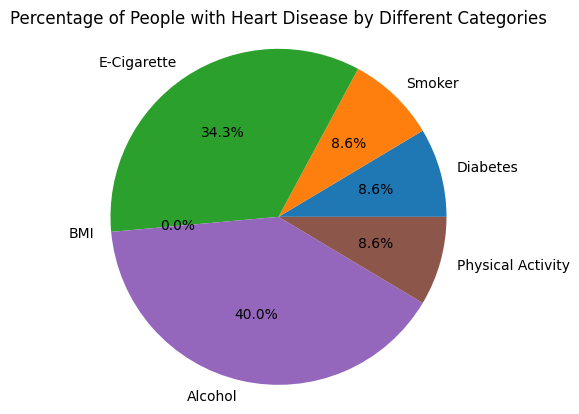

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Calculate the percentage of people with heart disease by different categories
categories = ['HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'BMI', 'AlcoholDrinkers', 'PhysicalActivities']
percentages = []
for category in categories:
    total = len(heart_data[category])
    positive = len(heart_data[(heart_data[category] == 1) & (heart_data['HadHeartAttack'] == 1)])
    percent = round(positive / total * 100, 2)
    percentages.append(percent)

# Create a pie chart
labels = ['Diabetes', 'Smoker', 'E-Cigarette', 'BMI', 'Alcohol', 'Physical Activity']
plt.pie(percentages, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of People with Heart Disease by Different Categories')
plt.show()

**3.2 Impact of Demographic Factors on Heart Disease Risk:**

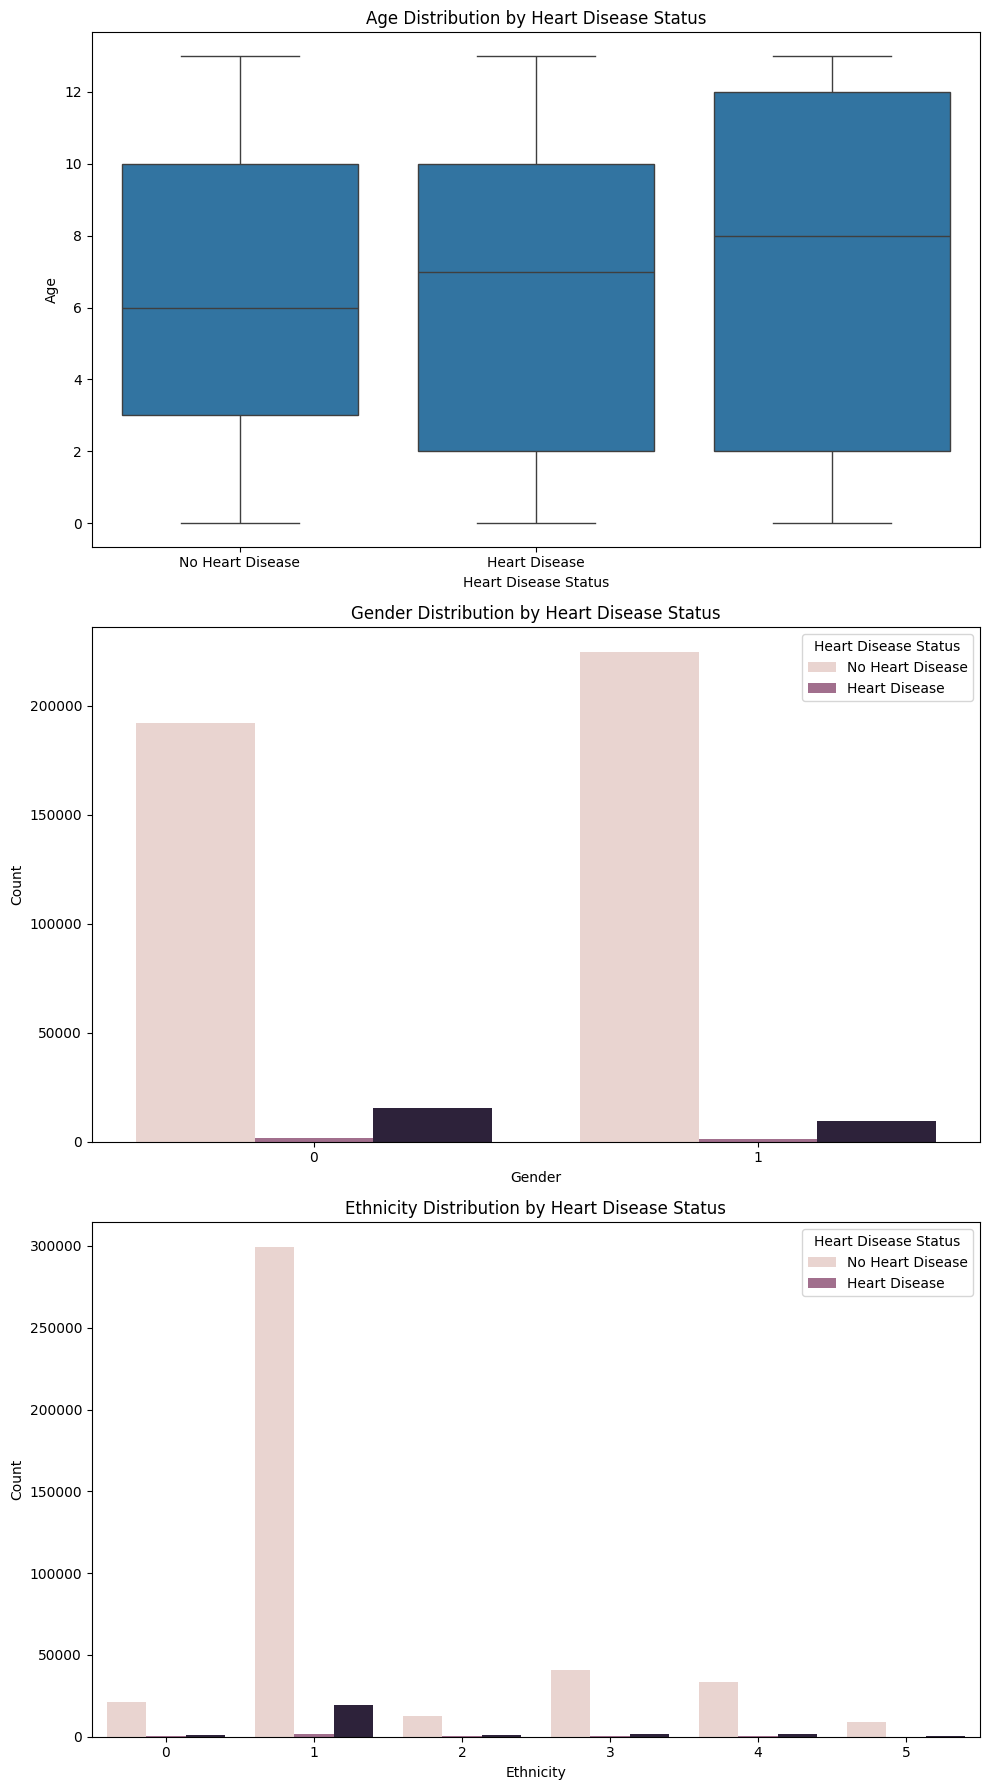

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot age distribution by heart disease status
sns.boxplot(x='HadHeartAttack', y='AgeCategory', data=heart_data, ax=axes[0])
axes[0].set_title('Age Distribution by Heart Disease Status')
axes[0].set_xlabel('Heart Disease Status')
axes[0].set_ylabel('Age')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Heart Disease', 'Heart Disease'])

# Plot gender distribution by heart disease status
sns.countplot(x='Sex', hue='HadHeartAttack', data=heart_data, ax=axes[1])
axes[1].set_title('Gender Distribution by Heart Disease Status')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(title='Heart Disease Status', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])

# Plot ethnicity distribution by heart disease status
sns.countplot(x='RaceEthnicityCategory', hue='HadHeartAttack', data=heart_data, ax=axes[2])
axes[2].set_title('Ethnicity Distribution by Heart Disease Status')
axes[2].set_xlabel('Ethnicity')
axes[2].set_ylabel('Count')
axes[2].legend(title='Heart Disease Status', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
